#### Mariana Quiroga Londono 
#### Simone's data test - FBM MNCs 
#### 26-04-21

In [34]:
#SETTING ENVIRONMENT 

import rpy2
#import tzlocal
#%load_ext rpy2.ipython

import numpy as np
import pandas as pd
import scanpy as sc

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, dpi_save=1000)

In [35]:
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(name='gene_cmap', colors=['lightgrey', 'thistle', 'red', 'darkred']) 

In [36]:
adata_initial= sc.read("010221_mq224_postQC_MNCs_ADTonmRNA_xSimone.h5ad") #this is adata_qc, pre-DSB 

In [37]:
adata_initial

AnnData object with n_obs × n_vars = 10792 × 198
    obs: 'barcode', 'status', 'assignment', 'log_prob_singleton', 'log_prob_doublet', 'cluster0', 'cluster1', 'cluster2', 'n_genes', 'n_counts'
    var: 'n_cells'

In [38]:
#post-QC, pre-DSB, now select only sinu-tipEC from mRNA.

In [39]:
#Read object and metadata
mrna_adata = sc.read("./Simone_data/fbm_mnc_citeseq_rna_pp_clus_20201208.h5ad")
labels = pd.read_csv("./Simone_data/fbm_mnc_meta_with_annot_20201208.csv",index_col="Unnamed: 0")
mrna_adata.obs["cell.labels"] = labels["cell.labels"]
cell_names = [x[:-2] for x in mrna_adata.obs_names]
mrna_adata.obs_names = cell_names
mrna_adata.obs

/usr/local/lib/python3.7/dist-packages/anndata/compat/__init__.py:161: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/anndata/compat/__init__.py:161: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  FutureWarning,


,souporcell_doublet,souporcell_assignment,orig.ident,lanes,sequencing.type,sex,mad_prd,auto_prd,is_doublet,nUMI,nGene,percent.mito,nUMI_protein,nAb,leiden,__is_in_cluster__,cell.labels
AAACCCAAGAGCATAT,singlet,1,sample_2,SIGAH2_SIGAH12,3prime,male,False,False,False,8763.0,2712,0.013580,414.0,83,10,False,pre B progenitor
AAACCCAAGGACTGGT,singlet,1,sample_2,SIGAH2_SIGAH12,3prime,male,False,False,False,44958.0,4893,0.028739,1452.0,93,1,False,early erythroid
AAACCCAAGGTCATAA,singlet,1,sample_2,SIGAH2_SIGAH12,3prime,male,False,False,False,41561.0,4971,0.021294,1430.0,94,1,False,early erythroid
AAACCCACAAGCGAAC,singlet,1,sample_2,SIGAH2_SIGAH12,3prime,male,False,False,False,14068.0,3244,0.012511,266.0,87,12,False,pre B progenitor
AAACCCACAATCTCTT,singlet,0,sample_1,SIGAH2_SIGAH12,3prime,female,False,False,False,5477.0,2267,0.015154,374.0,81,18,False,pre pro B progenitor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGCAGTCAGCC,singlet,1,sample_2,SIGAH2_SIGAH12,3prime,male,False,False,False,17406.0,3492,0.019419,968.0,136,9,False,MOP
TTTGTTGCATCCTAAG,singlet,1,sample_2,SIGAH2_SIGAH12,3prime,male,False,False,False,21899.0,4560,0.037216,1040.0,139,7,False,promonocyte
TTTGTTGCATGAGATA,singlet,1,sample_2,SIGAH2_SIGAH12,3prime,male,False,False,False,16615.0,2236,0.007704,272.0,76,19,False,mid erythroid
TTTGTTGTCAAATGAG,singlet,1,sample_2,SIGAH2_SIGAH12,3prime,male,False,False,False,10972.0,2582,0.033722,430.0,109,0,False,CD14 monocyte


In [40]:
mrna_adata

AnnData object with n_obs × n_vars = 8986 × 36601
    obs: 'souporcell_doublet', 'souporcell_assignment', 'orig.ident', 'lanes', 'sequencing.type', 'sex', 'mad_prd', 'auto_prd', 'is_doublet', 'nUMI', 'nGene', 'percent.mito', 'nUMI_protein', 'nAb', 'leiden', '__is_in_cluster__', 'cell.labels'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'orig.ident_colors', 'pca', 'rank_genes_groups', 'rank_genes_groups_filtered'
    obsm: 'X_orig_pca', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [41]:
adata_initial

AnnData object with n_obs × n_vars = 10792 × 198
    obs: 'barcode', 'status', 'assignment', 'log_prob_singleton', 'log_prob_doublet', 'cluster0', 'cluster1', 'cluster2', 'n_genes', 'n_counts'
    var: 'n_cells'

In [42]:
# get the overlapping genes between mRNA and AB
intersect = np.intersect1d(mrna_adata.obs_names, adata_initial.obs_names)
adata_qc = adata_initial[np.unique(intersect),:].copy()

In [43]:
adata_qc.obs["cell.labels"] = mrna_adata.obs["cell.labels"]

In [44]:
np.unique(adata_qc.obs["cell.labels"])

array(['CD14 monocyte', 'CD4 T cell', 'CD56 bright NK', 'CMP', 'DC1',
       'DC2', 'DC3', 'ELP', 'GMP', 'HSC', 'MK', 'MOP', 'basophil',
       'early MK', 'early erythroid', 'eosinophil', 'immature B cell',
       'late erythroid', 'mast cell', 'mid erythroid', 'naive B cell',
       'neutrophil', 'osteoclast', 'pDC', 'pre B progenitor',
       'pre pro B progenitor', 'pro B progenitor', 'promonocyte',
       'promyelocyte', 'sinusoidal EC', 'stromal macrophage', 'tip EC'],
      dtype=object)

In [45]:
adata_qc = adata_qc[adata_qc.obs['cell.labels'].isin(['sinusoidal EC','tip EC']),:].copy()

In [46]:
np.unique(adata_qc.obs["cell.labels"])

array(['sinusoidal EC', 'tip EC'], dtype=object)

In [47]:
adata_qc

AnnData object with n_obs × n_vars = 53 × 198
    obs: 'barcode', 'status', 'assignment', 'log_prob_singleton', 'log_prob_doublet', 'cluster0', 'cluster1', 'cluster2', 'n_genes', 'n_counts', 'cell.labels'
    var: 'n_cells'

In [48]:
import numpy as np
from sklearn.mixture import GaussianMixture
import anndata

cell_protein_matrix = adata_qc.copy()

### DSB METHOD - CLUSTERING AND VISUALIZATION

In [49]:
###########TEST: CAN WE GET RID OF THE BACKGROUND NOISE IN OUR PROTEIN DATA? DSB!

#SIGAD12_initial as the SUPER RAW

cell_protein_matrix = adata_initial[adata_qc.obs_names,:].copy()

#SIGAD12.shape

cell_protein_matrix.shape

(53, 198)

In [50]:
# adata here must be the read in from raw umi matrix
#We need to define empty droplets. 
#You split out the data. You assign how many cells as empty droplets 
def getNegDroplets(adata, lamda=5): 
    #lamnda controls how many empty droplets you will have in the end.
    #Its very hard to tell which is the numner of empty droplets.
    umi = np.log1p(np.sum(adata.X.toarray(), axis=1)) #umis per cell
    mu_umi = np.mean(umi) #mean of umi counts
    sd_umi = np.std(umi) #SD of the umi counts 
    print(mu_umi)
    print(sd_umi)
    sub_threshold = mu_umi-(lamda*sd_umi) 
    print(sub_threshold)
    plt.hist(umi, bins = 100)
    plt.axvline(x=sub_threshold,color='red')
    #Simplified version. They used Seurat function,  but we dont want that.
    #anything less than that would be empty droplets.
    return adata[umi<sub_threshold,:].copy()
    #any cell that has umi counts < threshold. 

6.277303
0.6199635
5.657339692115784
(1340, 198)


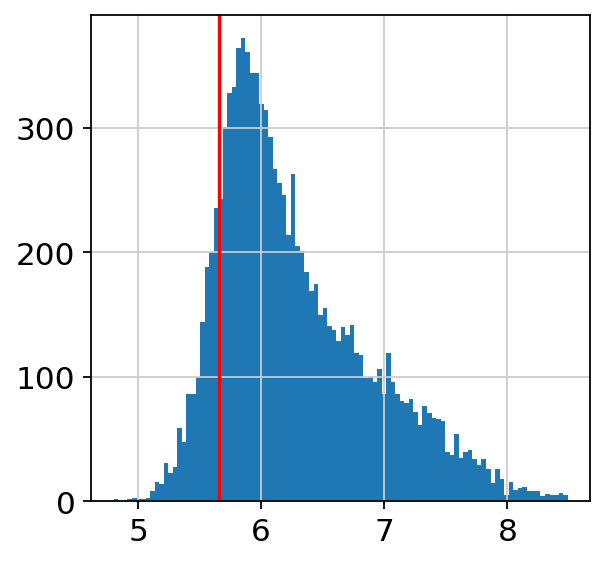

In [51]:
import matplotlib.pyplot as plt

empty_drop_matrix = getNegDroplets(adata_initial, lamda=1)
print(empty_drop_matrix.shape)

In [52]:
#renormalisation of the counts by empty droplets background.
#cell_protein_matrix and empty_drop_matrix are split from the same matrix,
#only difference is cells, but Ab is the same.
#cell_protein_matrix: adata object.
def DSB(cell_protein_matrix, empty_drop_matrix, pseudocount=10):
    adt = cell_protein_matrix.X.toarray() #meaningful cells xantibodies
    adtu = empty_drop_matrix.X.toarray() #the non meaninful - empty droplets 
    adt_log = np.log(adt+pseudocount) 
    adtu_log = np.log(adtu+pseudocount)
    mu_u = np.mean(adtu_log, axis=0) #for each protein in empty drop.
    sd_u = np.std(adtu_log, axis=0) #for each protein in empty drop.
    norm_adt = (adt_log-mu_u)/sd_u  #Y=log(Xi+P)-mu / sd
    adata_new = anndata.AnnData(X=norm_adt, obs=cell_protein_matrix.obs, var=cell_protein_matrix.var)
    #new normalised values
    print(adata_new.shape)
    cellwise_background_mean = np.array([]) #equation 2 from this line.
    for column in norm_adt.T:
        gmm = GaussianMixture(n_components=2) #for each protein
        gmm.fit(column.reshape(-1,1)) #you fit it
        cellwise_background_mean= np.append(cellwise_background_mean,gmm.means_[0])
        #you get the mean for the background
    print(len(cellwise_background_mean))
    adata_new.var['bg_mean'] = cellwise_background_mean #contains all the new normalised umi counts.
    #save it for the regression function, which we wont use!
    return adata_new

In [53]:
adata_new = DSB(cell_protein_matrix, empty_drop_matrix, pseudocount = 5)
cell_protein_matrix.shape

(53, 198)


/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_


198


(53, 198)

In [54]:
#empty_drop_matrix = getNegDroplets(adata)
#adata_new = DSB(cell_protein_matrix, empty_drop_matrix)
#sc.pp.regress_out(adata_new, keys=['bg_mean'])

adata_new.raw = adata_new

adata_new1=adata_new.copy().T

#for each protein you regress out the effect of the background noise.
####sc.pp.regress_out(adata_new1, keys=['bg_mean'])

adata_new2 = adata_new1.T

adata_new2.raw = adata_new

DSB_output0 = adata_new2.copy()

In [55]:
DSB_output0

AnnData object with n_obs × n_vars = 53 × 198
    obs: 'barcode', 'status', 'assignment', 'log_prob_singleton', 'log_prob_doublet', 'cluster0', 'cluster1', 'cluster2', 'n_genes', 'n_counts'
    var: 'n_cells', 'bg_mean'

In [56]:
DSB_output0.raw = DSB_output0

In [57]:
sc.tl.pca(DSB_output0, svd_solver='arpack')

computing PCA
    with n_comps=50
    finished (0:00:00)


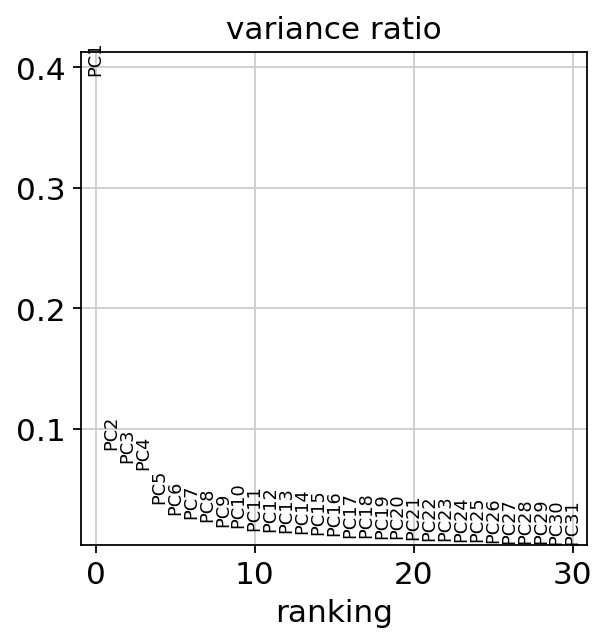

In [58]:
sc.pl.pca_variance_ratio(DSB_output0, log=False)

In [59]:
sc.pp.neighbors(DSB_output0, n_neighbors=10, n_pcs=30)

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)


In [60]:
sc.tl.umap(DSB_output0)
sc.tl.draw_graph(DSB_output0)
sc.tl.leiden(DSB_output0, resolution=0.5)
sc.tl.louvain(DSB_output0, resolution=0.5)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:00)
running Leiden clustering
    finished: found 2 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 2 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


In [62]:
DSB_output0.obs["cell.labels"] = adata_qc.obs["cell.labels"]

In [63]:
DSB_output0.obs["cell.labels"]

AAAGGATAGCGGTATG    sinusoidal EC
AACAAGATCGTAATGC    sinusoidal EC
AACCAACTCACGACTA    sinusoidal EC
AACCATGCAATGACCT    sinusoidal EC
AAGACAATCATCACTT    sinusoidal EC
AATAGAGGTTAGTCGT    sinusoidal EC
ACATCGACACAAGCTT    sinusoidal EC
ACGGTTAGTTAAGACA    sinusoidal EC
ACTCTCGAGACTTCGT    sinusoidal EC
AGACACTGTACCGTGC    sinusoidal EC
AGATAGATCGGTCAGC    sinusoidal EC
AGTGACTTCTTCGATT           tip EC
ATCGGATTCCTATTTG           tip EC
ATGAGTCGTGATTGGG    sinusoidal EC
ATGGATCCAGAACATA    sinusoidal EC
ATTCACTGTGACCTGC           tip EC
ATTCCTACACCTGATA    sinusoidal EC
CAATACGAGTTTCGGT    sinusoidal EC
CACCAAACAAAGACTA    sinusoidal EC
CATGCAAAGCCATCCG    sinusoidal EC
CCTGTTGAGCTACGTT           tip EC
CTATAGGGTACCGTCG    sinusoidal EC
CTCAGAATCCACAAGT    sinusoidal EC
CTCATGCGTCGATTTG    sinusoidal EC
CTCGAGGCAGGTGACA           tip EC
CTGATCCCAAGAGTAT           tip EC
CTGTATTTCTTAGCCC    sinusoidal EC
GACCGTGTCCATTGTT           tip EC
GACTCAAAGCGATTCT    sinusoidal EC
GATCCCTAGAAGCG

In [ ]:
#df=pd.DataFrame(adata.X.toarray(),columns=adata.var_names, index= adata.obs_names)
#df.to_csv("postQC_ADT_raw_FBM-MNCs.csv")

# Sinu - Tip EC dotplot

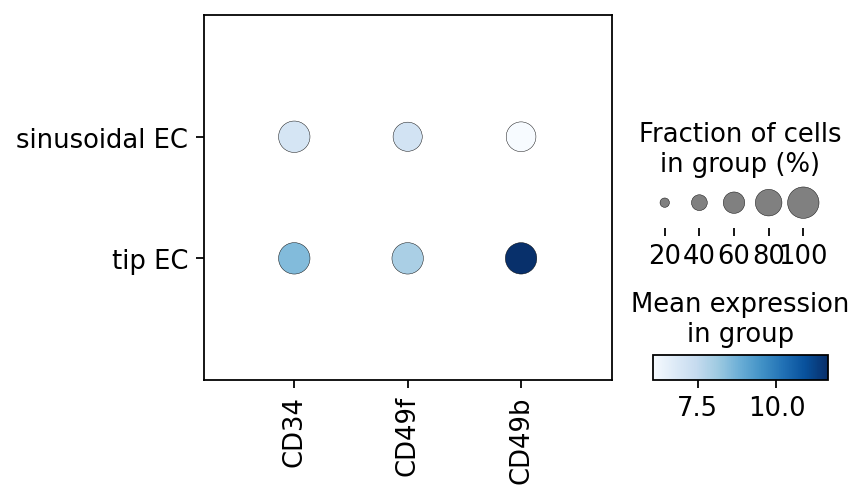

In [73]:
sc.pl.dotplot(DSB_output0, var_names=["CD34","CD49f","CD49b"], groupby="cell.labels",cmap="Blues", figsize = (5,3),save="20210426_Fig_ADT_SinuTipEC_MNCs_FBM_dotplot_selectedmarkers.pdf")

In [74]:
pwd

'/rds/project/rds-SDzz0CATGms/users/mq224/HCA_project/BM/Stage3_demultiplexing/ADT/Xiaonan_test_FBM3_MNCs'